# Time Series Utils - Forecasting example: Future Sales dataset (Kaggle)

### 0 - Setup

In [39]:
from ts_utils import *

In [76]:
dtf = pd.read_csv('data.csv')
dtf.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [77]:
dtf["date"] = pd.to_datetime(dtf['date'], format='%d.%m.%Y')

In [80]:
ts = dtf.groupby("date")["item_cnt_day"].sum().rename("sales")
ts.head()

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
Name: sales, dtype: float64

In [81]:
ts.tail()

date
2015-10-27    1551.0
2015-10-28    3593.0
2015-10-29    1589.0
2015-10-30    2274.0
2015-10-31    3104.0
Name: sales, dtype: float64

### 1 - TimeSeries Analysis

###### Group variables by info
- pk: PassengerId, Name
- y: Survived
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

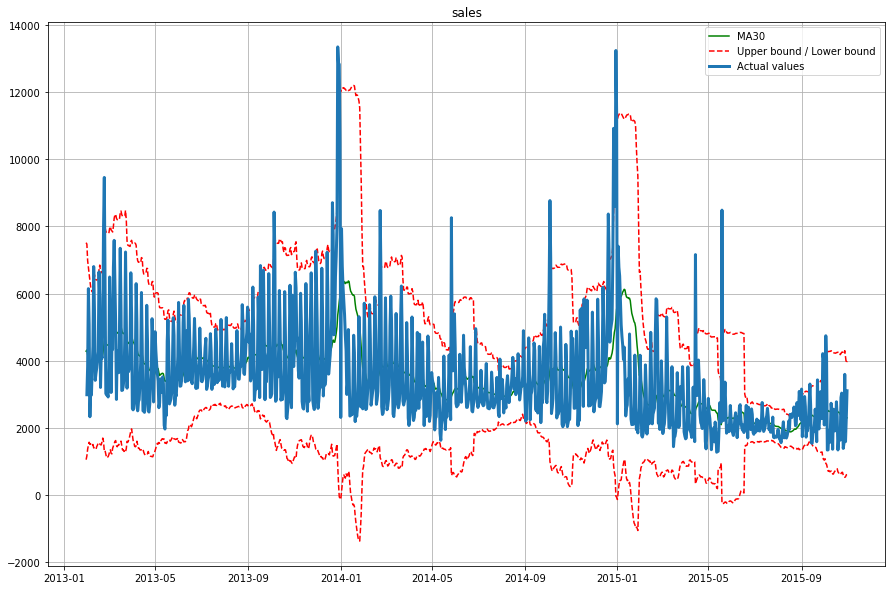

In [90]:
plot_ts(ts, plot_ma=True, plot_intervals=True, window=30, figsize=(15,10))

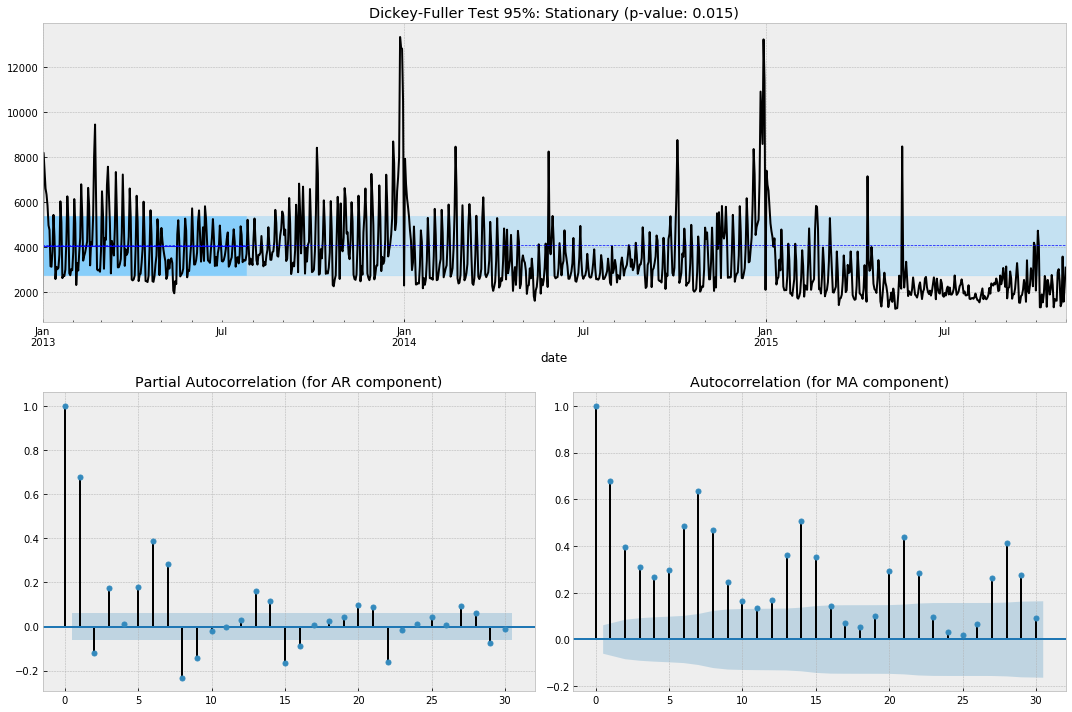

In [91]:
test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize=(15,10))

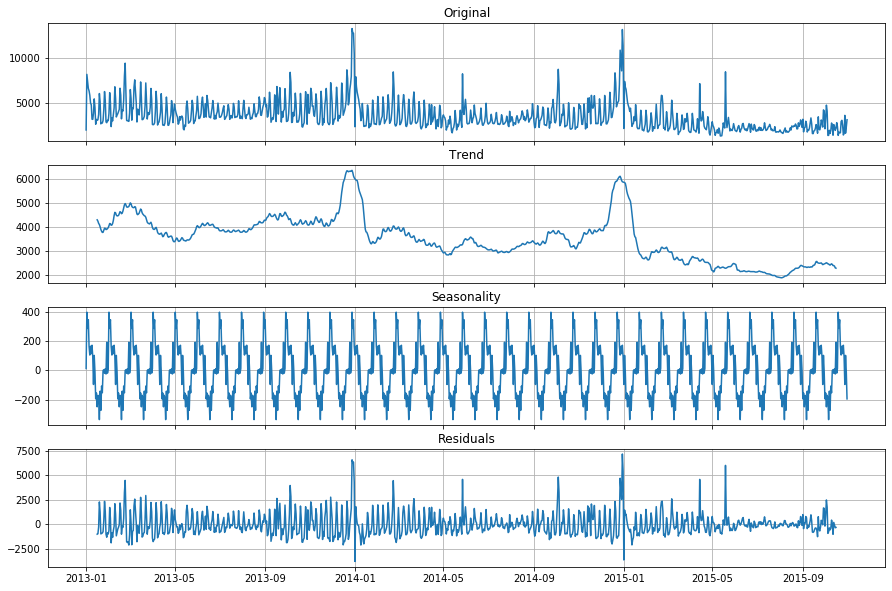

In [92]:
dic_decomposed = decompose_ts(ts, freq=30, figsize=(15,10))

### 2 - Baseline

Seasonal parameters: additive Seasonality every 30 observations
--- splitting at index --- 827


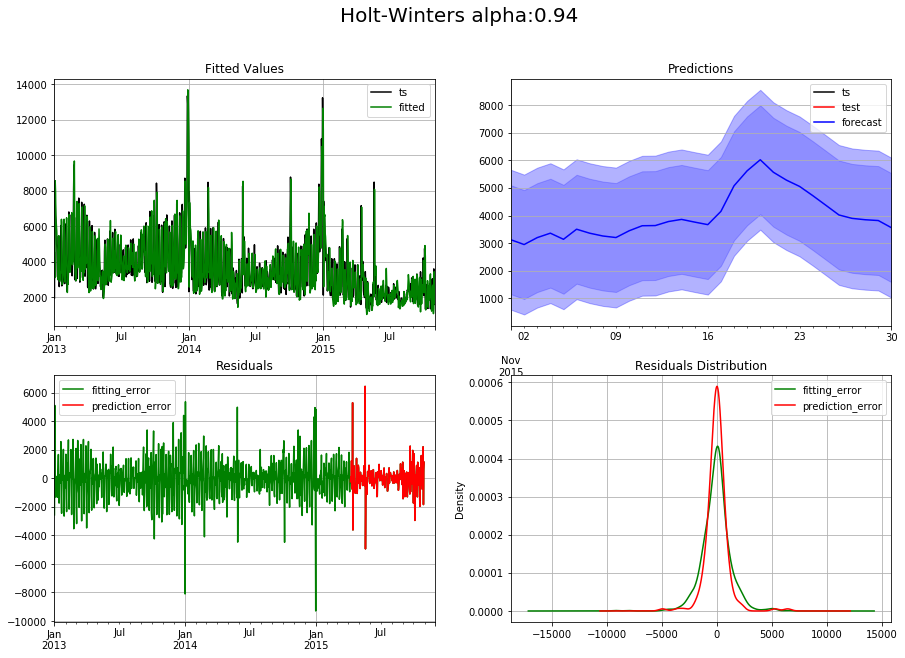

error_mean: -50.0 error_std: 1292.0 mae: 893.0 mape: 26.0 mse: 1669419.0 rmse: 1292.0


In [101]:
holtwinters, model = fit_expsmooth(ts, trend="additive", seasonal="additive", s=30, alpha=0.94, test=0.2, 
                                   pred_ahead=30, figsize=(15,10))

### 3 - Forecast Desing & Testing

In [ ]:
find_best_sarimax(ts, seasonal=True, stationary=False, s=30, exog=None)